In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import cv2

import functions as fn

In [2]:
dataDir='../data'
trainDir='train2017'
valDir='val2017'

trainAnn=f'{dataDir}/annotations/instances_{trainDir}.json'
valAnn=f'{dataDir}/annotations/instances_{valDir}.json'

cocoTrain=COCO(trainAnn)
cocoVal=COCO(valAnn)

loading annotations into memory...
Done (t=9.86s)
creating index...
index created!
loading annotations into memory...
Done (t=0.34s)
creating index...
index created!


In [3]:
catIds = cocoTrain.getCatIds(catNms=['person'])
imgIds = cocoTrain.getImgIds(catIds=catIds)
imgIds_2 = cocoTrain.getImgIds(imgIds=imgIds)

In [4]:
img = {'license': 3,
 'file_name': '000000102771.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000102771.jpg',
 'height': 640,
 'width': 480,
 'date_captured': '2013-11-16 21:36:01',
 'flickr_url': 'http://farm4.staticflickr.com/3141/3060074174_c540b56d2e_z.jpg',
 'id': 102771}

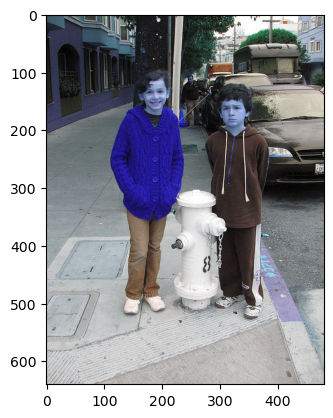

In [5]:
fpath = '{}/{}/{}'.format(dataDir, trainDir, img['file_name'])

test_img = cv2.imread(fpath, -1)
plt.imshow(test_img)

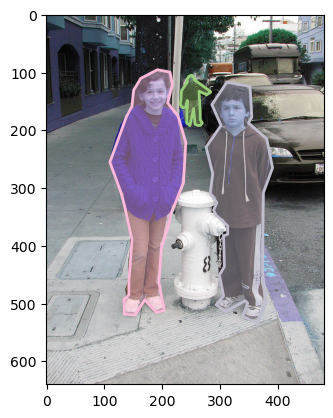

In [6]:
plt.imshow(test_img)

anns_ids = cocoTrain.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = cocoTrain.loadAnns(anns_ids)
cocoTrain.showAnns(anns)

In [7]:
anns[0]['bbox']

[109.5, 94.84, 131.5, 424.61]

In [8]:
#import numpy
#from PIL import Image, ImageDraw

#polygon = anns[0]['segmentation'][0]
#width = int(np.round(anns[0]['bbox'][2]))
#height = int(np.round(anns[0]['bbox'][3]))


In [9]:
#width

In [10]:
#mask_img = Image.new('L', (width, height), 0)
#ImageDraw.Draw(mask_img).polygon(polygon, outline=1, fill=1)
#mask = numpy.array(mask_img)

In [11]:
#fn.display_image('test', test_img)

In [12]:
#cv2.imshow('image', test_img)
#while True:
#    k = cv2.waitKey(100) # change the value from the original 0 (wait forever) to something appropriate
#    if k == 27:
#        print('ESC')
#        cv2.destroyAllWindows()
#        break        
#    if cv2.getWindowProperty('image',cv2.WND_PROP_VISIBLE) < 1:        
#        break            
#cv2.destroyAllWindows()

In [13]:
# mask defaulting to black for 3-channel and transparent for 4-channel
# (of course replace corners with yours)
mask = np.zeros(test_img.shape, dtype=np.uint8)
roi_corners = fn.coco_polyseg_formatted(anns[0])
# fill the ROI so it doesn't get wiped out when the mask is applied
channel_count = test_img.shape[2]  # i.e. 3 or 4 depending on your image
ignore_mask_color = (255,)*channel_count
cv2.fillConvexPoly(mask, roi_corners, ignore_mask_color)
# from Masterfool: use cv2.fillConvexPoly if you know it's convex

# apply the mask
masked_image = cv2.bitwise_and(test_img, mask)

fn.display_image(masked_image)

# save the result
#cv2.imwrite('image_masked.png', masked_image)

In [14]:
#np.array(anns[0]['segmentation'][0]).astype(np.int32)

In [15]:
#np.array([[(10,10), (300,300), (10,300)]], dtype=np.int32)

In [16]:
#new_arr = []
#temp = anns[0]['segmentation'][0]

#for i in range(int(len(temp) / 2)):
#    new_arr.append([temp[2 * i], temp[2 * i + 1]])

#new_arr

In [17]:
#temp

In [18]:
#len(anns[0]['segmentation'][0])

In [19]:
fn.coco_polyseg_formatted(anns[0])

array([[142, 485],
       [142, 461],
       [147, 389],
       [134, 327],
       [128, 307],
       [109, 255],
       [138, 175],
       [147, 157],
       [150, 130],
       [162, 109],
       [191,  94],
       [213,  98],
       [217, 120],
       [209, 152],
       [227, 174],
       [241, 220],
       [236, 290],
       [214, 345],
       [213, 355],
       [198, 404],
       [194, 463],
       [201, 498],
       [204, 511],
       [190, 515],
       [169, 493],
       [153, 519],
       [134, 518],
       [134, 492]])

In [20]:
test_masked_img = fn.generate_masked_images(test_img, anns[2])

fn.display_image(test_masked_img, window_name='Joe')

ValueError: too many values to unpack (expected 2)